In [93]:
from __future__ import division
import numpy as np, scipy as sp, seaborn as sns, pandas as pd, mpmath as mp
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

In [94]:
def readZF (filename, c1=4, c2=7): # running averages extraction force, extension
    file = open(filename, 'r')
    Z = []
    F = []
    numrows = 0
    with open(filename,'r') as file1:
        numrows = len(file1.readlines())
    i = 0
    totalz = 0
    totalf = 0
    with open (filename, 'r') as file2:
        for row in range(numrows):
            line = file.readline().strip()
            data = line.split()
            if data and data[0] == 'SMD':
                i+=1
                totalz += float(data[c1])
                totalf += float(data[c2])
            if (i == 999):
                Z.append(totalz/1000)
                F.append(totalf/1000)
                i = 0
                totalz = 0
                totalf = 0
            
    return [Z,F]

In [95]:
cd log_files

[WinError 2] The system cannot find the file specified: 'log_files'
C:\second_year\biophysics\DNA\DNA\log_files


In [96]:
Z = [] # graph different concentrations for same speed
F = []
[ztemp1,ftemp1] = readZF('qwikmd_production_smd_2_0_5_10.log')
F= [z for _,z in sorted(zip(ztemp1,ftemp1))]
Z=sorted(ztemp1)

In [97]:
kT = 4.114 # pN *nm

In [98]:
def Force(z,L,Lp): # marko-siggia WLC
    return (kT/Lp)*(1/(4*(1-z/L)**2) - 0.25 + z/L)

def extension(f,L,Lp,K): # odijk WLC: need to also fit K(elastic modulus)
    print(Lp)
    return L*(1-0.5*((kT/(f*Lp))**(0.5)) + f/K)

# def extension(f, L, Lp, K): # smith et al FJC: need to also fit K
#     return (L*(mp.coth(2*f*Lp/kT)) - kT/(2*f*Lp))*(1+f/K)

# def Force(z, f, L, Lp, K): # modified marko-siggia WLC
#     return (kT/Lp)*(1/(4*(1-z/L+f/K)**2) - 0.25 + z/L - f/K)
    

In [99]:
popt, pcov = curve_fit(Force, Z, F, p0 = [11.831, 0.064])

# popt, pcov = curve_fit(extension, F, Z, p0 = [25.9, 1322, 3344])

#popt, pcov = curve_fit(Force, Z, F, p0 = [-110.52, -1.39, -1.23, -4.89])

In [100]:
popt

array([11.83072372,  0.06432105])

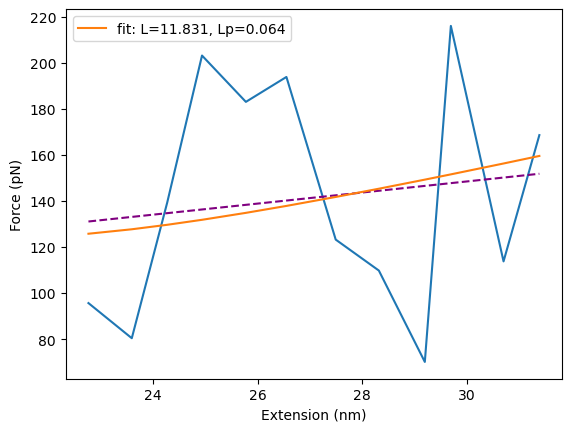

In [101]:
Z = np.array(Z)
F = np.array(F)

plt.plot(Z,F)
a,b = np.polyfit(Z,F,1)
plt.plot(Z, a*Z+b, color = 'purple', linestyle = '--')
plt.plot(Z, Force(Z, *popt),
         label='fit: L=%5.3f, Lp=%5.3f' % tuple(popt))

# plt.plot(Z,F)
# a,b = np.polyfit(Z,F,1)
# plt.plot(Z, a*Z+b, color = 'purple', linestyle = '--')
# plt.plot(extension(F, *popt), F, 
#          label='fit: L=%5.3f, Lp=%5.3f, K=%5.3f' % tuple(popt))

# plt.plot(Z,F)
# a,b = np.polyfit(Z,F,1)
# plt.plot(Z, a*Z+b, color = 'purple', linestyle = '--')
# plt.plot(Z, Force(Z, *popt),
#          label='fit: F=%5.3f, L=%5.3f, Lp=%5.3f, K=%5.3f' % tuple(popt))

plt.ylabel('Force (pN)')
plt.xlabel('Extension (nm)')

plt.legend()
plt.show()